### Importación de datos



In [ ]:
import pandas as pd # importacion de libreria de pandas para el analisis de datos
import matplotlib.pyplot as plt # importacion de libreria matplotlib para visualizar graficos
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(8)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904


#1. Análisis de facturación



In [2]:


# Diccionario para almacenar los ingresos por tienda
ingresos_por_tienda = {}

# Analizar cada tienda
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    # Calcular el ingreso total (Precio * Cantidad)
    # Asumiendo que cada fila representa una venta de 1 unidad
    ingreso_total = tienda['Precio'].sum()
    
    # Almacenar el resultado
    ingresos_por_tienda[f'Tienda {i}'] = ingreso_total

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Tienda': list(ingresos_por_tienda.keys()),
    'Ingreso Total': list(ingresos_por_tienda.values())
})

# Formatear los valores para mostrar todos los dígitos
resultados['Ingreso Total'] = resultados['Ingreso Total'].apply(lambda x: '{:,.0f}'.format(x))

# Imprimir los resultados con formato
print("\nIngresos totales por tienda:\n")
print(resultados.to_string(index=False))

ingresos_numericos = ingresos_por_tienda

# Encontrar la tienda con menor ingreso
tienda_menor_ingreso = min(ingresos_numericos.items(), key=lambda x: x[1])
print("=======================================================================")
print(f"La tienda con menor ingreso total es {tienda_menor_ingreso[0]} con ${tienda_menor_ingreso[1]:,.0f} COP")
print("=======================================================================")



Ingresos totales por tienda:

  Tienda Ingreso Total
Tienda 1 1,150,880,400
Tienda 2 1,116,343,500
Tienda 3 1,098,019,600
Tienda 4 1,038,375,700
La tienda con menor ingreso total es Tienda 4 con $1,038,375,700 COP


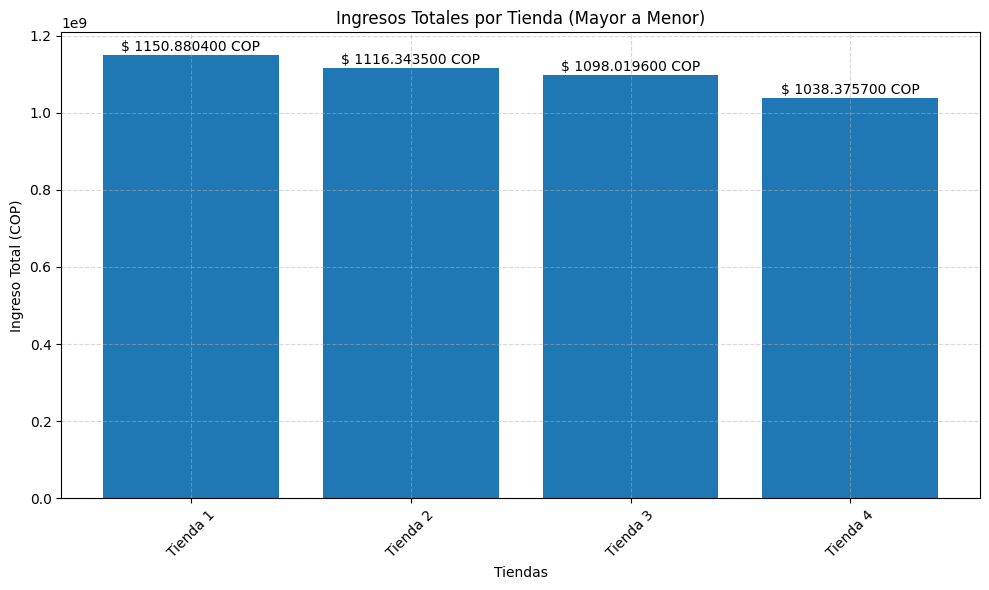

 En la grafica de barras se puede evidenciar que la tiennda con menores ingresos totales
deacuerdo alos valores de facturacion es  la tienda numero cuatro(4)
y asi en cada una de las tres(3) visualizaciones que se muestran a continuacion.


In [3]:

# Ordenar resultados por ingreso total de mayor a menor
resultados_ordenados = resultados.copy()
resultados_ordenados['Ingreso Total'] = resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float)
resultados_ordenados = resultados_ordenados.sort_values('Ingreso Total', ascending=False)
resultados_ordenados['Ingreso Total'] = resultados_ordenados['Ingreso Total'].apply(lambda x: '{:,.0f}'.format(x))

# Crear gráfico de barras ordenado
plt.figure(figsize=(10, 6))
plt.bar(resultados_ordenados['Tienda'], resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float))
plt.title('Ingresos Totales por Tienda (Mayor a Menor)')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total (COP)')
plt.grid(True, linestyle='--', alpha=0.5)
# Agregar los valores encima de las barras
for i, valor in enumerate(resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float)):
    plt.text(i, valor + 10000000, f'$ {valor / 1e6:.6f} COP', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

print(" =======================================================================================")
print(" En la grafica de barras se puede evidenciar que la tiennda con menores ingresos totales\ndeacuerdo alos valores de facturacion es  la tienda numero cuatro(4)\ny asi en cada una de las tres(3) visualizaciones que se muestran a continuacion.")

print(" =======================================================================================")

# Resultado de la evaluacion de la grafica

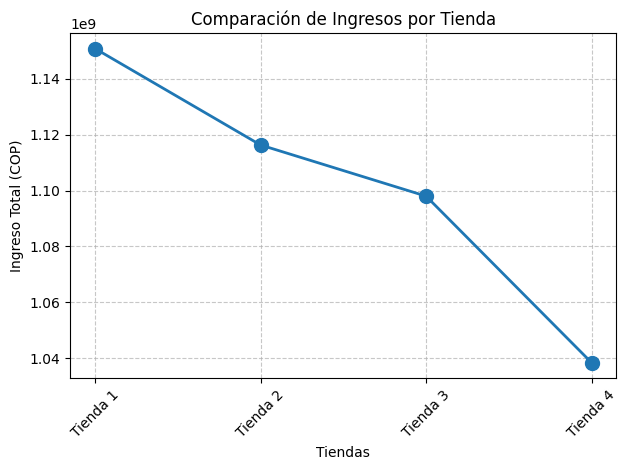

In [ ]:

# Crear gráfico de líneas para comparar las tiendas
plt.figure(figsize=(6.4, 4.8))
plt.plot(resultados_ordenados['Tienda'], 
         resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float),
         marker='o', 
         linewidth=2,
         markersize=10)
plt.title('Comparación de Ingresos por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total (COP)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


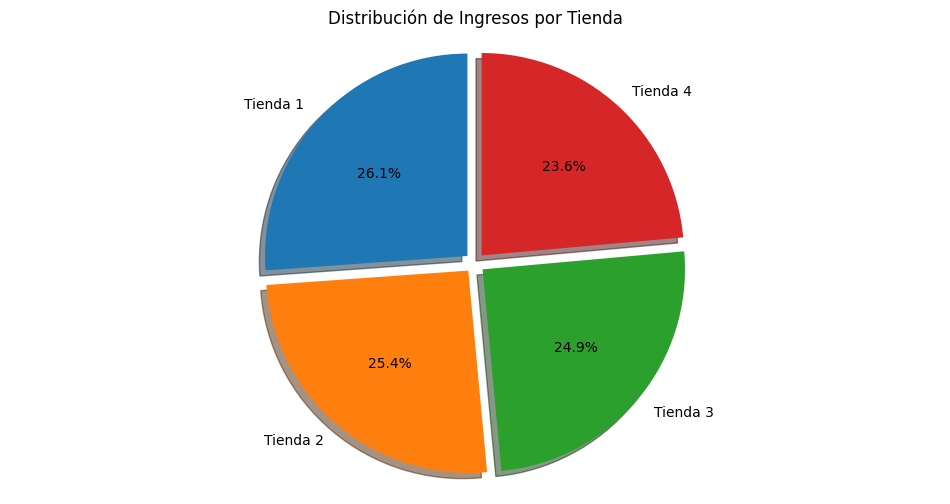

In [5]:
# Crear gráfico circular (pie) para mostrar proporción de ingresos
plt.figure(figsize=(12, 6))
plt.pie(resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float),
        labels=resultados_ordenados['Tienda'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05]*4)
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')
plt.show()
plt.close()

# 2. Ventas por categoría

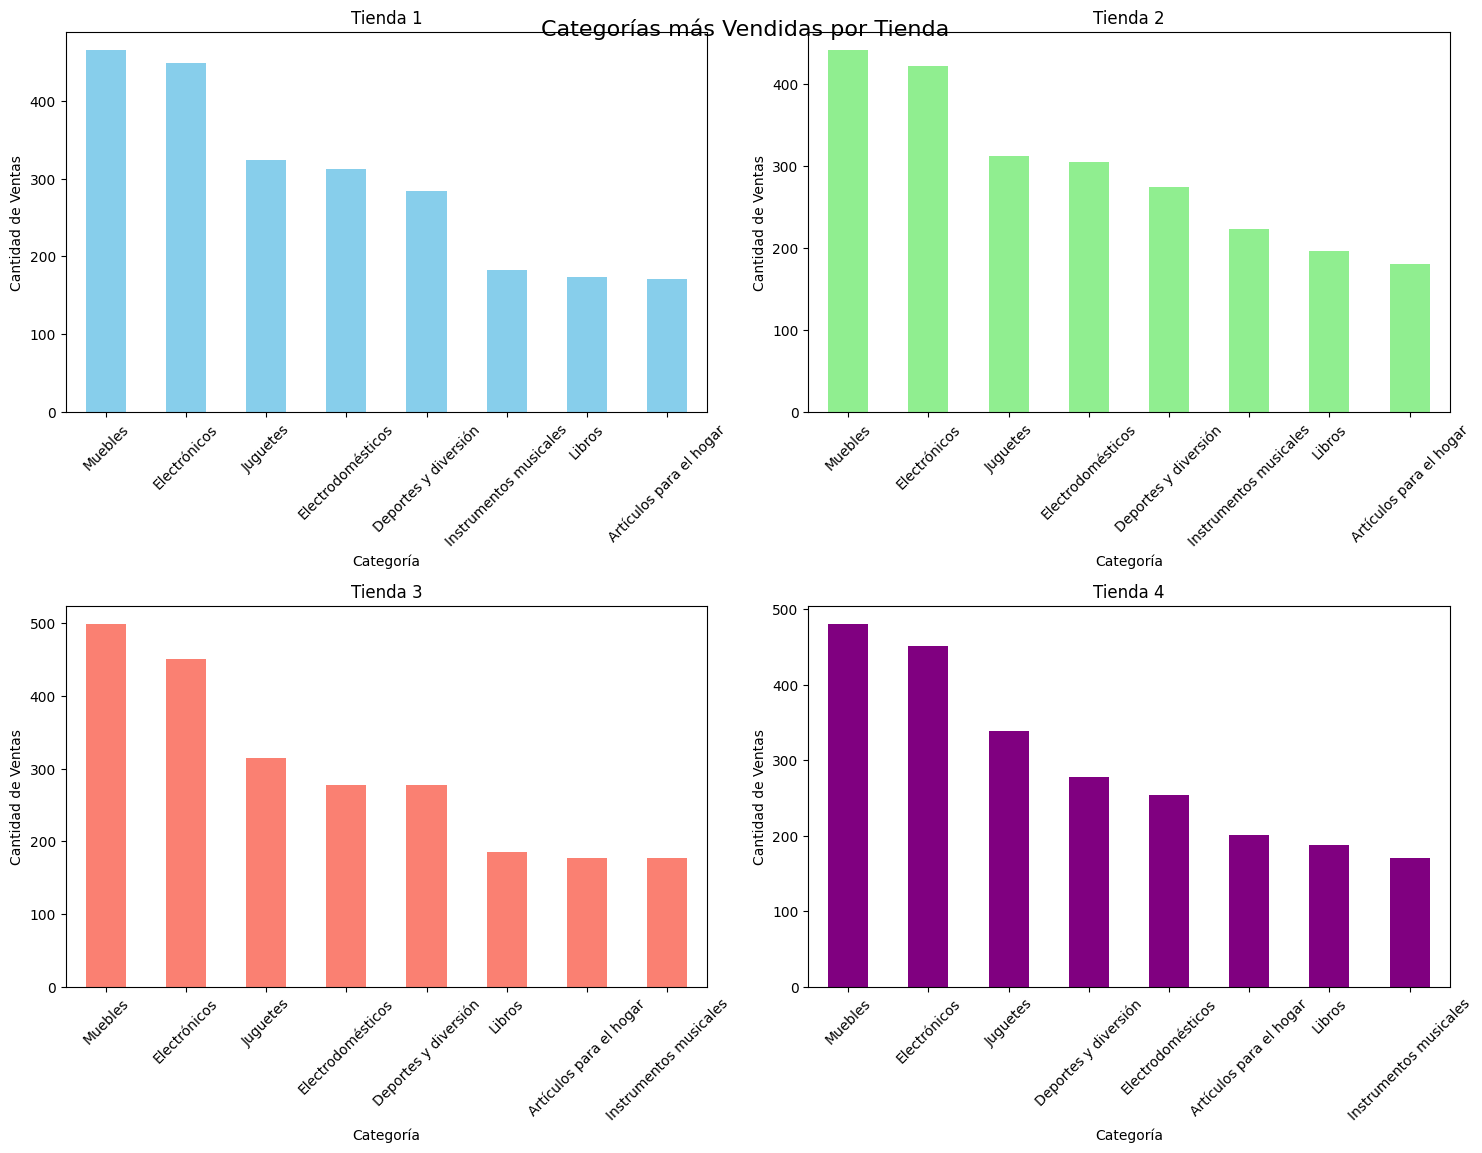

                   Resumen de ventas por categoría en cada tienda                     
                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


In [6]:
# Crear DataFrames para almacenar las ventas por categoría de cada tienda
ventas_categoria_t1 = tienda1.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_t2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_t3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_t4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)

# Crear subplots para mostrar las categorías más vendidas de cada tienda
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Categorías más Vendidas por Tienda', fontsize=16, y=0.95)

# Gráfico para Tienda 1
ventas_categoria_t1.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Tienda 1')
ax1.set_xlabel('Categoría')
ax1.set_ylabel('Cantidad de Ventas')
ax1.tick_params(axis='x', rotation=45)

# Gráfico para Tienda 2
ventas_categoria_t2.plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Tienda 2')
ax2.set_xlabel('Categoría')
ax2.set_ylabel('Cantidad de Ventas')
ax2.tick_params(axis='x', rotation=45)

# Gráfico para Tienda 3
ventas_categoria_t3.plot(kind='bar', ax=ax3, color='salmon')
ax3.set_title('Tienda 3')
ax3.set_xlabel('Categoría')
ax3.set_ylabel('Cantidad de Ventas')
ax3.tick_params(axis='x', rotation=45)

# Gráfico para Tienda 4
ventas_categoria_t4.plot(kind='bar', ax=ax4, color='purple')
ax4.set_title('Tienda 4')
ax4.set_xlabel('Categoría')
ax4.set_ylabel('Cantidad de Ventas')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
plt.close()

# Crear un DataFrame con el resumen de ventas por categoría para todas las tiendas
resumen_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria_t1,
    'Tienda 2': ventas_categoria_t2,
    'Tienda 3': ventas_categoria_t3,
    'Tienda 4': ventas_categoria_t4
}).fillna(0)

print("===================================================================================== ")
print("                   Resumen de ventas por categoría en cada tienda                     ")
print("===================================================================================== ")
print(resumen_categorias)
print("===================================================================================== ")

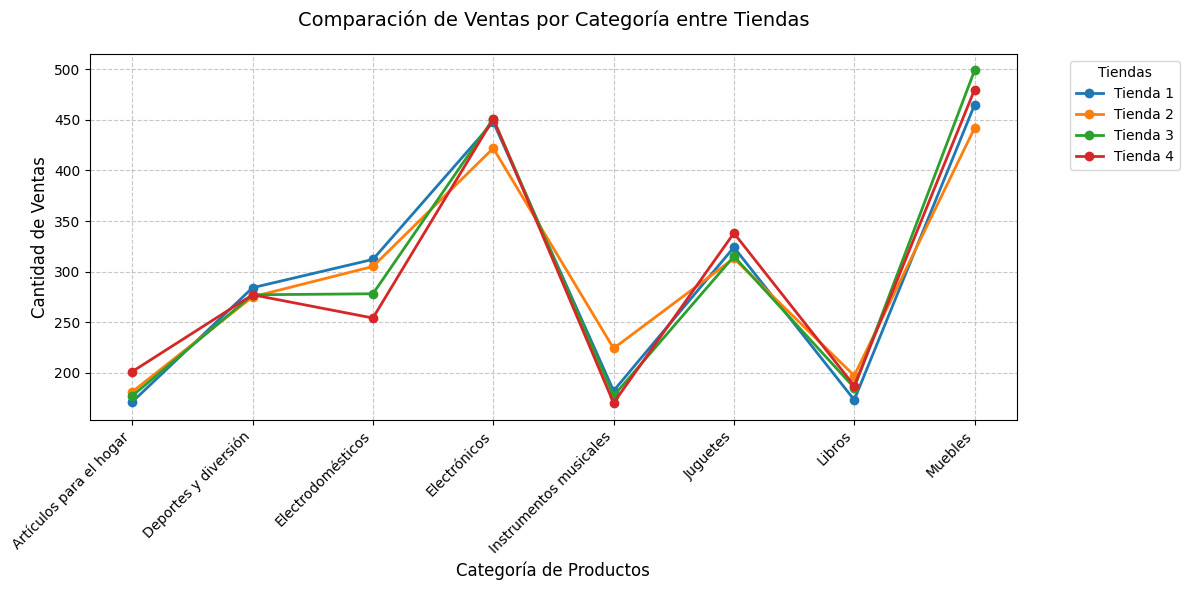

In [7]:
# Crear una figura con un tamaño adecuado para el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar las líneas para cada tienda
for tienda in resumen_categorias.columns:
    plt.plot(resumen_categorias.index, resumen_categorias[tienda], marker='o', linewidth=2, label=tienda)

# Personalizar el gráfico
plt.title('Comparación de Ventas por Categoría entre Tiendas', pad=20, size=14)
plt.xlabel('Categoría de Productos', size=12)
plt.ylabel('Cantidad de Ventas', size=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar que se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()
plt.close()



# 3. Calificación promedio de la tienda


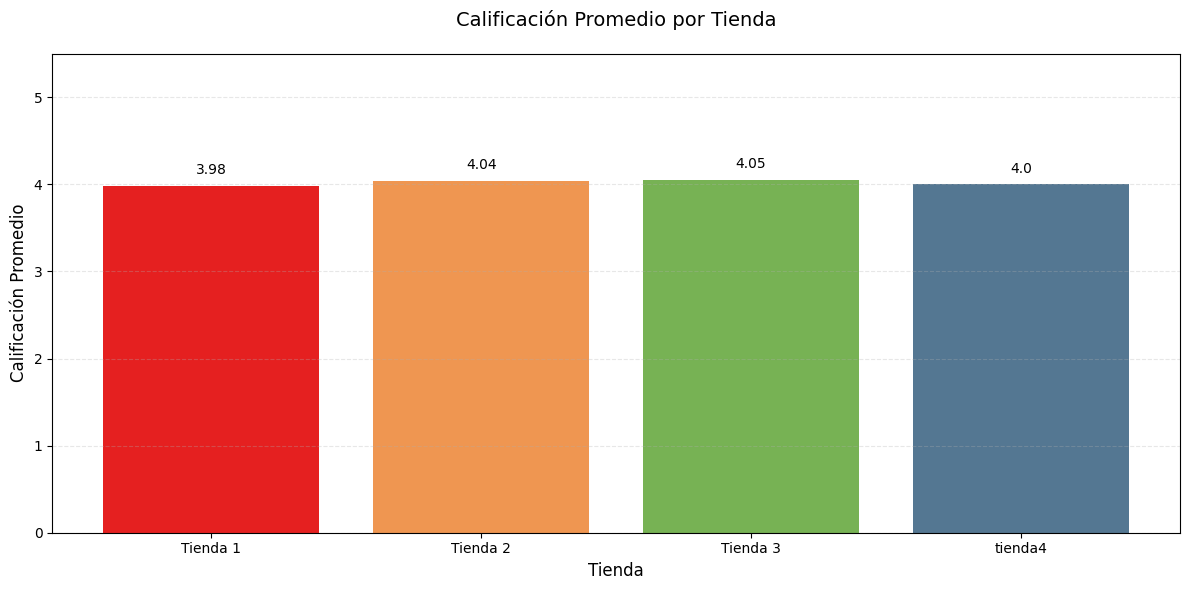

In [20]:
# Inicializar una lista para lmacenar los resultados de las calificaciones promedio
calificacion_promedio_tiendas = []



# Calcular el promedio de calificaciones por tienda
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    # Calcular el promedio de calificaciones y redondear a 2 decimales
    promedio = tienda['Calificación'].mean().round(2)
    calificacion_promedio_tiendas.append(promedio)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'tienda4'],
    'Calificación Promedio': calificacion_promedio_tiendas
})

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
plt.bar(resultados['Tienda'], resultados['Calificación Promedio'], color=['#E52020', '#EF9651', '#77B254', '#547792'])

# Personalizar el gráfico
plt.title('Calificación Promedio por Tienda', pad=20, size=14)
plt.xlabel('Tienda', size=12)
plt.ylabel('Calificación Promedio', size=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Agregar las etiquetas de valor sobre cada barra
for i, v in enumerate(resultados['Calificación Promedio']):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Ajustar el rango del eje y para mejor visualización
plt.ylim(0, 5.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
plt.close()

 



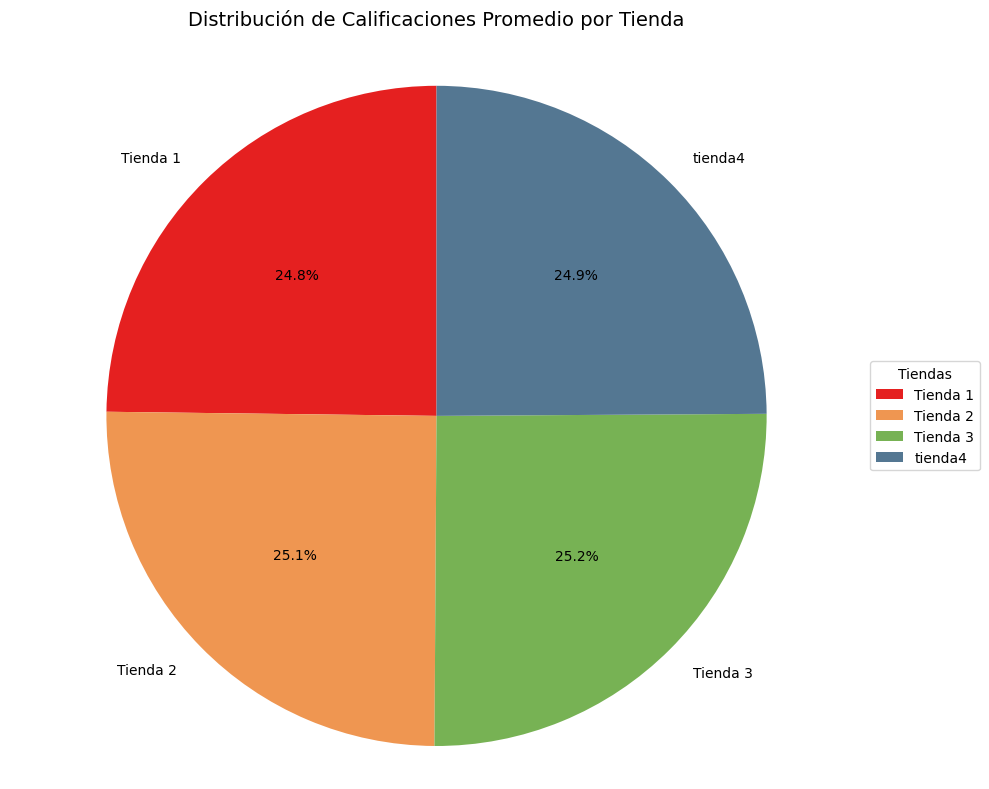

In [27]:
# Calcular el porcentaje de cada calificación promedio sobre el total
total = resultados['Calificación Promedio'].sum()
porcentajes = (resultados['Calificación Promedio'] / total * 100).round(1)

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(10, 8))

# Crear el gráfico de torta
plt.pie(porcentajes, 
        labels=resultados['Tienda'],
        autopct='%1.1f%%',
        colors=['#E52020', '#EF9651', '#77B254', '#547792'],
        startangle=90)

# Agregar título
plt.title('Distribución de Calificaciones Promedio por Tienda', pad=20, size=14)

# Agregar leyenda
plt.legend(resultados['Tienda'], 
          title="Tiendas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Asegurar que el círculo sea redondo
plt.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
plt.close()


# 4. Productos más y menos vendidos


Tienda 1 - 6 Productos más vendidos:
Producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0
Lavavajillas         62054900.0
Name: Precio, dtype: float64

Tienda 1 - 6 Productos menos vendidos:
Producto
Cuerda para saltar          652800.0
Dinosaurio Rex              688900.0
Cubo mágico 8x8             696900.0
Set de vasos               1359100.0
Ajedrez de madera          1430600.0
Dashboards con Power BI    1455700.0
Name: Precio, dtype: float64


Tienda 2 - 6 Productos más vendidos:
Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Secadora de ropa     59115100.0
Name: Precio, dtype: float64

Tienda 2 - 6 Productos menos vendidos:
Producto
Cubo mágico 8x8             643600.0
Dinosaurio Rex              770300.0
Cuerda para saltar          856900.0
Aje

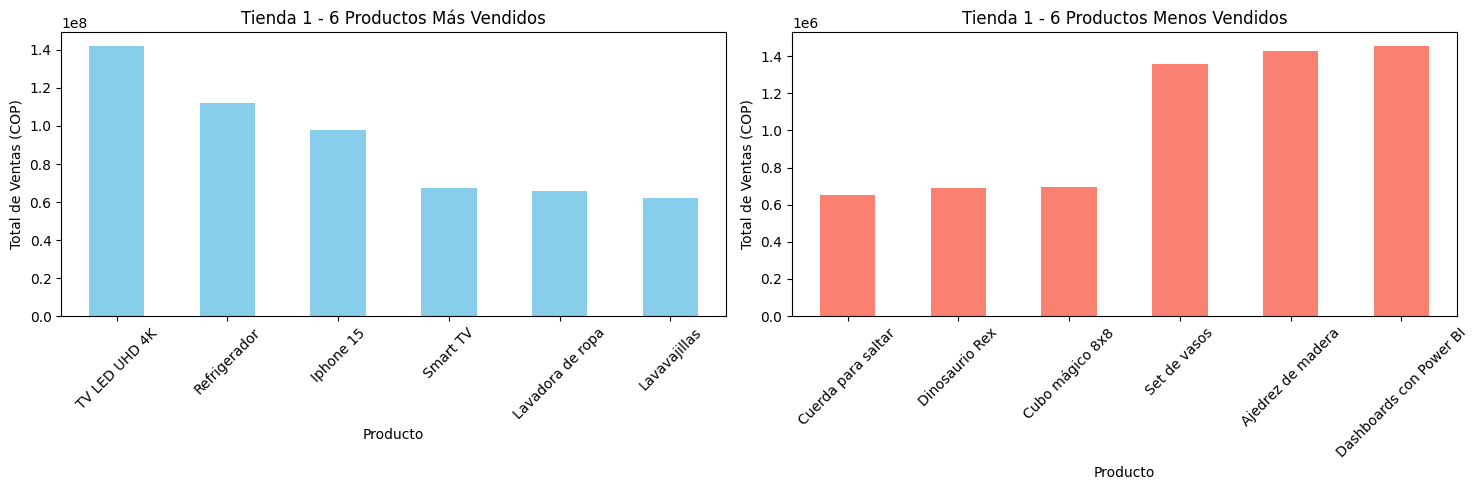

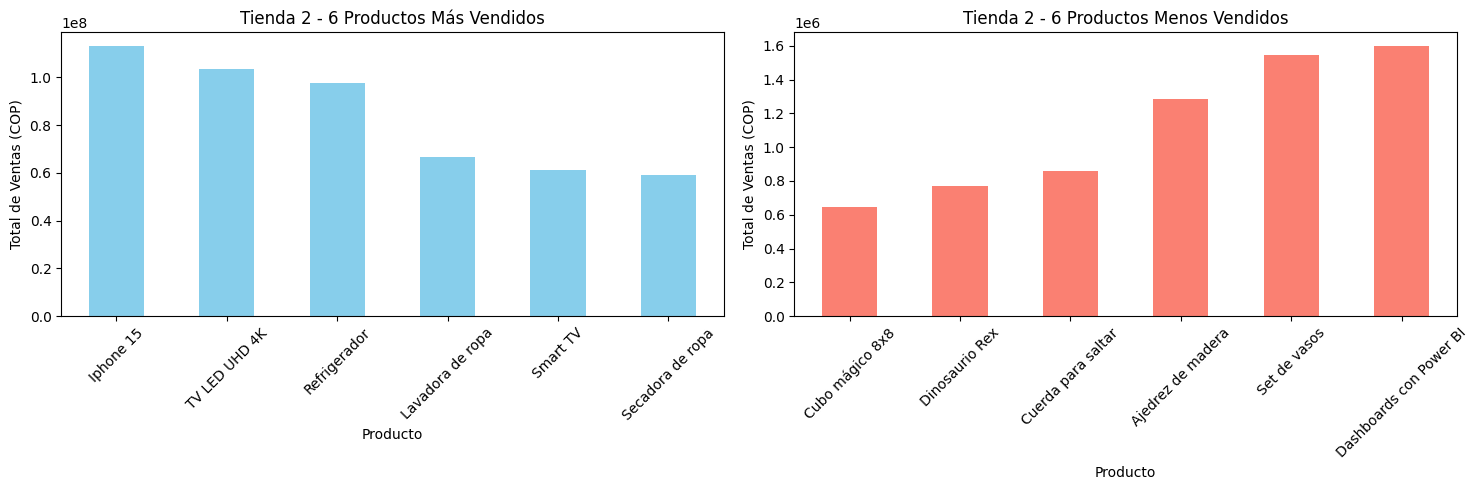

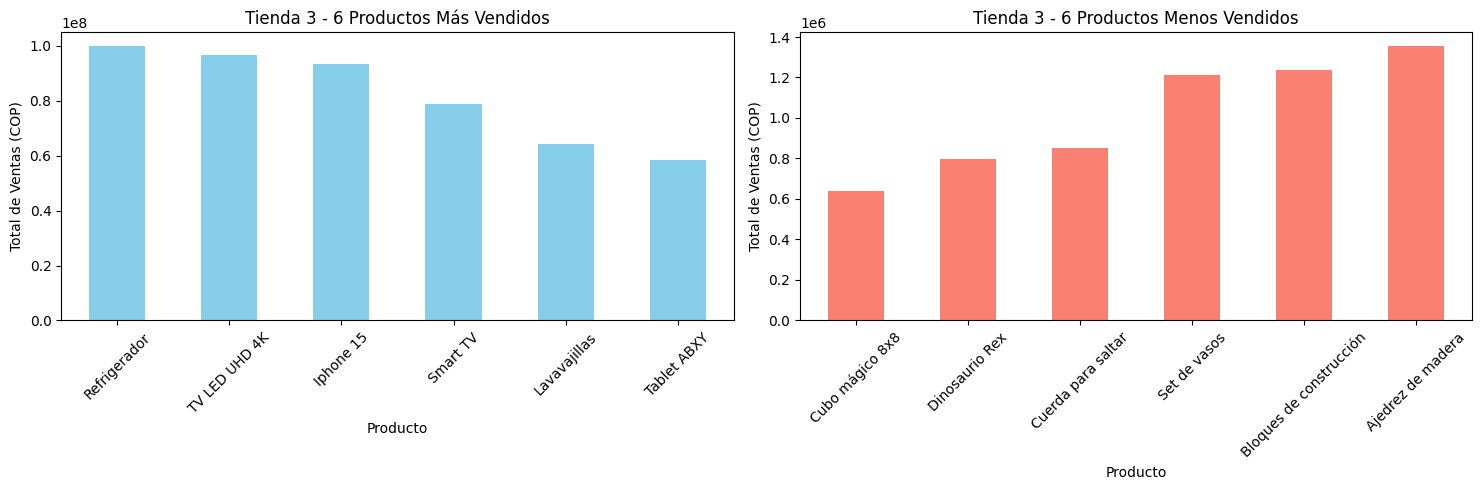

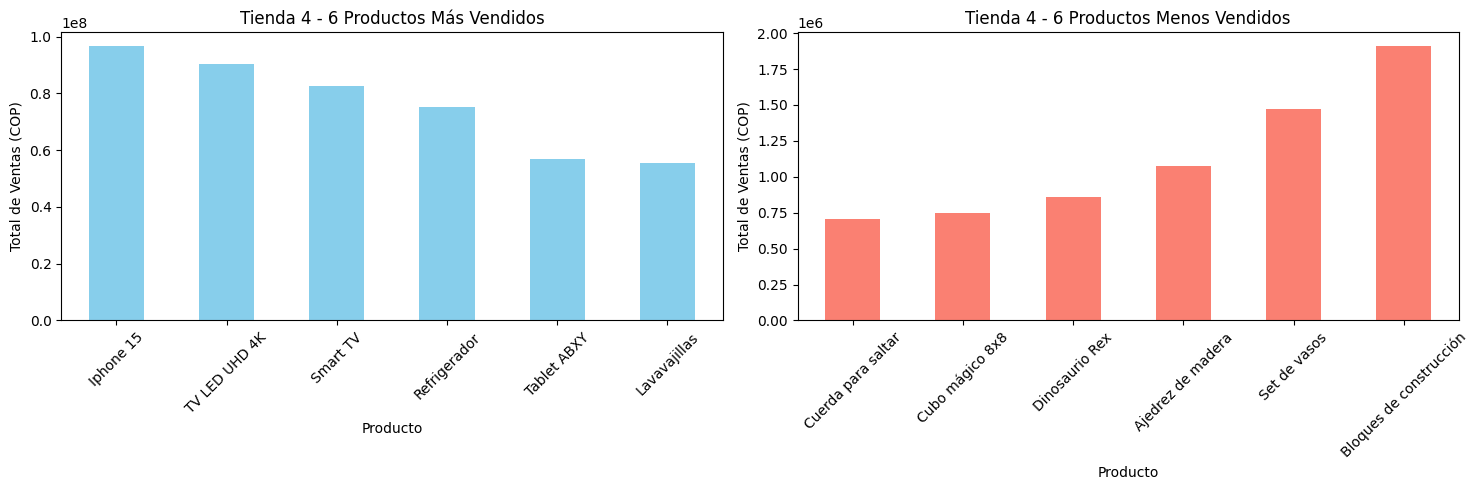

In [42]:
# Crear listas para almacenar los productos más y menos vendidos por tienda
productos_mas_vendidos_por_tienda = []
productos_menos_vendidos_por_tienda = []

# Obtener los 3 productos más y menos vendidos para cada tienda
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    # Obtener productos más vendidos
    productos_mas = tienda.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head(6)
    # Obtener productos menos vendidos
    productos_menos = tienda.groupby("Producto")["Precio"].sum().sort_values(ascending=True).head(6)
    
    # Almacenar los resultados
    productos_mas_vendidos_por_tienda.append(productos_mas)
    productos_menos_vendidos_por_tienda.append(productos_menos)
    
    # Imprimir los resultados para cada tienda
    print(f"\nTienda {i} - 6 Productos más vendidos:")
    print(productos_mas)
    print(f"\nTienda {i} - 6 Productos menos vendidos:")
    print(productos_menos)
    print("\n" + "="*50)

# Crear visualizaciones para cada tienda
for i in range(4):
    plt.figure(figsize=(15, 5))
    
    # Gráfico de productos más vendidos
    plt.subplot(1, 2, 1)
    productos_mas_vendidos_por_tienda[i].plot(kind='bar', color='skyblue')
    plt.title(f'Tienda {i+1} - 6 Productos Más Vendidos')
    plt.xticks(rotation=45)
    plt.ylabel('Total de Ventas (COP)')
    
    # Gráfico de productos menos vendidos
    plt.subplot(1, 2, 2)
    productos_menos_vendidos_por_tienda[i].plot(kind='bar', color='salmon')
    plt.title(f'Tienda {i+1} - 6 Productos Menos Vendidos')
    plt.xticks(rotation=45)
    plt.ylabel('Total de Ventas (COP)')
    
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.show()
    plt.close()

# 5. Envío promedio por tienda

In [39]:
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175
